# Introduction

In [1]:
import datetime
from pathlib import Path
import os

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns

## Config

We define a base directory path

In [3]:
BASE_FILE_DIR = Path("temp")

then we create a string that we can then edit to our liking with the `.format()` method

In [4]:
file_path_crib = 'data/{category}/{year}-{month:02d}/{province}-{day:02d}-{month:02d}-{year}.csv'

We create a list of dictionaries containing dictionaries with keys `name` and `url` of each of the dataset to extract

In [5]:
categories = [
    {
        "name": "pharmacies",
        "url": "http://datos.salud.gob.ar/dataset/39117f8f-e2bc-4571-a572-15a6ce7ea9e1/resource/19338ea7-a492-4af3-b212-18f8f4af9184/download/establecimientos-farmacias-enero-2021.csv"
    }
]

## Extract

In [6]:
farmacias = categories[0]
farmacias

{'name': 'pharmacies',
 'url': 'http://datos.salud.gob.ar/dataset/39117f8f-e2bc-4571-a572-15a6ce7ea9e1/resource/19338ea7-a492-4af3-b212-18f8f4af9184/download/establecimientos-farmacias-enero-2021.csv'}

In [7]:
r = requests.get(farmacias["url"])
r.encoding = 'utf-8'
r

<Response [200]>

create a path string

In [8]:
now = datetime.datetime.now()
now
# create a path string
file_path = file_path_crib.format(
    category=farmacias["name"],
    year=now.year,
    month=now.month,
    day=now.day,
    province="Argentina"
)
file_path

'data/pharmacies/2022-10/Argentina-16-10-2022.csv'

In [9]:
farmacias_path = BASE_FILE_DIR / file_path
farmacias_path

PosixPath('temp/data/pharmacies/2022-10/Argentina-16-10-2022.csv')

In [10]:
farmacias_path.parent.mkdir(parents=True, exist_ok=True)

extract all pharmacies

In [11]:
with open(farmacias_path, "w") as f:
    f.write(r.text)

## Transform

In [12]:
df = pd.read_csv(farmacias_path)
df.head()

,establecimiento_id,establecimiento_nombre,localidad_id,localidad_nombre,provincia_id,provincia_nombre,departamento_id,departamento_nombre,cod_loc,cod_ent,origen_financiamiento,tipologia_id,tipologia_nombre,tipologia,cp,domicilio,sitio_web
0,70260072329721,PUJOL,26007020000,PUERTO MADRYN,26,CHUBUT,7,BIEDMA,20,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,9120,LOS MAITENES 1538,NaN
1,70100352324743,SALUDFARMA,10035020000,BELEN,10,CATAMARCA,35,BELÉN,20,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,4750,Mitre 14,NaN
2,70064412318286,MARSICO,6441030015,LA PLATA,6,BUENOS AIRES,441,LA PLATA,30,15.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,1900,Avenida 7 445,NaN
3,70340492347884,PERALTA HNOS,34049010000,CLORINDA,34,FORMOSA,49,PILCOMAYO,10,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,3610,Avenida San Martin 470,NaN
4,70140142334991,VALENTINO,14014010000,CORDOBA,14,CÓRDOBA,14,CAPITAL,10,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,5000,Catamarca 1047,NaN


In [13]:

df.isnull().sum()

establecimiento_id            0
establecimiento_nombre        0
localidad_id                  0
localidad_nombre              0
provincia_id                  0
provincia_nombre              0
departamento_id               0
departamento_nombre           0
cod_loc                       0
cod_ent                     384
origen_financiamiento         0
tipologia_id                  0
tipologia_nombre              0
tipologia                     0
cp                            0
domicilio                     0
sitio_web                 13633
dtype: int64

In [14]:
df.columns

Index(['establecimiento_id', 'establecimiento_nombre', 'localidad_id',
       'localidad_nombre', 'provincia_id', 'provincia_nombre',
       'departamento_id', 'departamento_nombre', 'cod_loc', 'cod_ent ',
       'origen_financiamiento', 'tipologia_id', 'tipologia_nombre',
       'tipologia', 'cp', 'domicilio', 'sitio_web'],
      dtype='object')

Renombrar las columnas

In [15]:
renamed_cols = {
    'establecimiento_id': 'id',
    'establecimiento_nombre': 'name',
    'domicilio':'adress',
    'localidad_id': 'id_location',
    'localidad_nombre': 'location',
    'provincia_id': 'id_province',
    'provincia_nombre': 'province',
    'departamento_id': 'id_department',
    'departamento_nombre': 'department',
    'cod_loc': 'cod_location',
    'tipologia_id': 'id_tipology',
    'tipologia_nombre': 'tipology',
    'cp': 'postal_code',
    'sitio_web': 'webpage',
}

In [16]:
df = df.rename(columns = renamed_cols)

In [17]:
df.columns
df.set_index("id")

,name,id_location,location,id_province,province,id_department,department,cod_location,cod_ent,origen_financiamiento,id_tipology,tipology,tipologia,postal_code,adress,webpage
id,,,,,,,,,,,,,,,,
70260072329721,PUJOL,26007020000,PUERTO MADRYN,26,CHUBUT,7,BIEDMA,20,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,9120,LOS MAITENES 1538,NaN
70100352324743,SALUDFARMA,10035020000,BELEN,10,CATAMARCA,35,BELÉN,20,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,4750,Mitre 14,NaN
70064412318286,MARSICO,6441030015,LA PLATA,6,BUENOS AIRES,441,LA PLATA,30,15.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,1900,Avenida 7 445,NaN
70340492347884,PERALTA HNOS,34049010000,CLORINDA,34,FORMOSA,49,PILCOMAYO,10,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,3610,Avenida San Martin 470,NaN
70140142334991,VALENTINO,14014010000,CORDOBA,14,CÓRDOBA,14,CAPITAL,10,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,5000,Catamarca 1047,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70460212355713,FARMACOST,46021020000,ANILLACO,46,LA RIOJA,21,CASTRO BARROS,20,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,5301,Coronel Nicolas Barros s/n Barrio Virgen del F...,NaN
70421472354613,FARMACIA MUSSO,42147030000,TRENEL,42,LA PAMPA,147,TRENEL,30,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,6369,9 DE JULIO 545,NaN
70940142195567,FARMACIA- HOSPITAL REGIONAL USHUAIA,94014020000,USHUAIA,94,TIERRA DEL FUEGO,14,USHUAIA,20,0.0,Provincial,70,FARMACIA,Farmacia en Establecimiento de Salud,9410,12 de octubre 65,NaN


In [18]:
cols = [
    'id',
    'name',
    'id_province',
    'province',
    'id_department',
    'department',
    'id_location',
    'location',
    'postal_code',
    'adress',
    'webpage',
]

In [19]:
df = df[cols]
df

,id,name,id_province,province,id_department,department,id_location,location,postal_code,adress,webpage
0,70260072329721,PUJOL,26,CHUBUT,7,BIEDMA,26007020000,PUERTO MADRYN,9120,LOS MAITENES 1538,NaN
1,70100352324743,SALUDFARMA,10,CATAMARCA,35,BELÉN,10035020000,BELEN,4750,Mitre 14,NaN
2,70064412318286,MARSICO,6,BUENOS AIRES,441,LA PLATA,6441030015,LA PLATA,1900,Avenida 7 445,NaN
3,70340492347884,PERALTA HNOS,34,FORMOSA,49,PILCOMAYO,34049010000,CLORINDA,3610,Avenida San Martin 470,NaN
4,70140142334991,VALENTINO,14,CÓRDOBA,14,CAPITAL,14014010000,CORDOBA,5000,Catamarca 1047,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13672,70460212355713,FARMACOST,46,LA RIOJA,21,CASTRO BARROS,46021020000,ANILLACO,5301,Coronel Nicolas Barros s/n Barrio Virgen del F...,NaN
13673,70421472354613,FARMACIA MUSSO,42,LA PAMPA,147,TRENEL,42147030000,TRENEL,6369,9 DE JULIO 545,NaN
13674,70940142195567,FARMACIA- HOSPITAL REGIONAL USHUAIA,94,TIERRA DEL FUEGO,14,USHUAIA,94014020000,USHUAIA,9410,12 de octubre 65,NaN
13675,70420702154608,FARMACIA INSTITUCIONAL E.A. MANUEL FREIRE,42,LA PAMPA,70,GUATRACHÉ,42070030000,GUATRACHE,6309,Primera Junta Nº 158,NaN


## Load

In [20]:
# create a path string
file_path = file_path_crib.format(
    category=farmacias["name"],
    year=now.year,
    month=now.month,
    day=now.day,
    province="ETL-Argentina"
)
farmacias_path = BASE_FILE_DIR / file_path
df.to_csv(farmacias_path)

## Data Analisys Example

### Total Pharmacies by Provinces

In [21]:
provinces = df['province'].value_counts().keys()
total_farmacias = df['province'].value_counts().values

Index(['BUENOS AIRES', 'SANTA FE', 'CABA', 'TUCUMÁN', 'MISIONES', 'CÓRDOBA',
       'ENTRE RÍOS', 'CHACO', 'SALTA', 'CORRIENTES', 'RÍO NEGRO', 'LA PAMPA',
       'SANTIAGO DEL ESTERO', 'SAN LUIS', 'SAN JUAN', 'NEUQUÉN', 'CHUBUT',
       'JUJUY', 'CATAMARCA', 'FORMOSA', 'LA RIOJA', 'SANTA CRUZ',
       'TIERRA DEL FUEGO', 'MENDOZA'],
      dtype='object')

In [22]:
df_provincias = pd.DataFrame(
    {
        "Provinces": provinces,
        "Total_Pharms": total_farmacias,
        "Total_Pharms_in_percent": total_farmacias/ df.shape[0]
    }
)
df_provincias

,Provinces,Total_Pharms,Total_Pharms_in_percent
0,BUENOS AIRES,5053,0.369452
1,SANTA FE,1778,0.129999
2,CABA,1024,0.074870
3,TUCUMÁN,611,0.044674
4,MISIONES,594,0.043431
5,CÓRDOBA,566,0.041383
6,ENTRE RÍOS,489,0.035753
7,CHACO,426,0.031147
8,SALTA,337,0.024640
9,CORRIENTES,303,0.022154


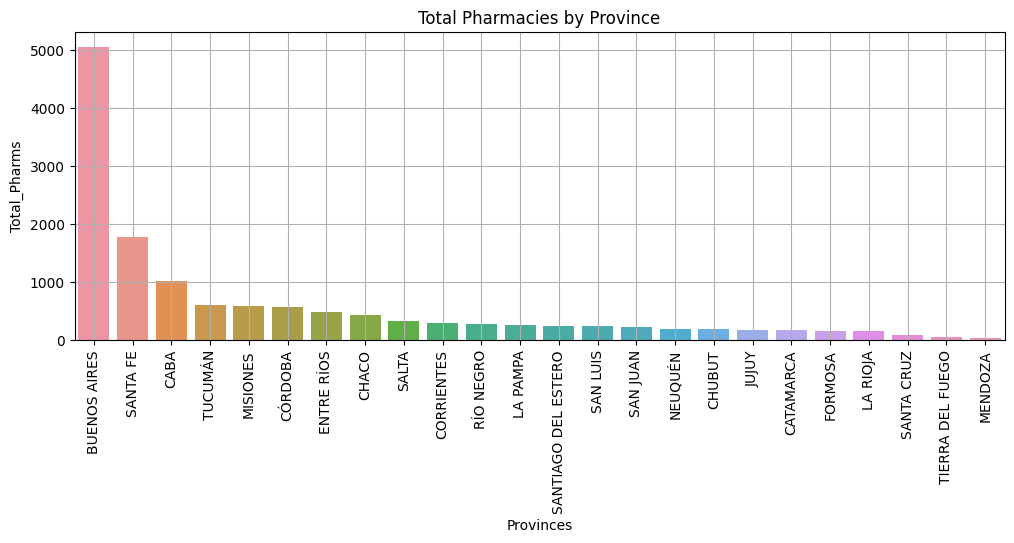

In [23]:
# barplot of all the features
fig = plt.figure(figsize = (12,4))
sns.barplot(x = 'Provinces', y = 'Total_Pharms', data = df_provincias)
plt.xticks(rotation=90) 
plt.grid()
plt.title("Total Pharmacies by Province")
plt.show()

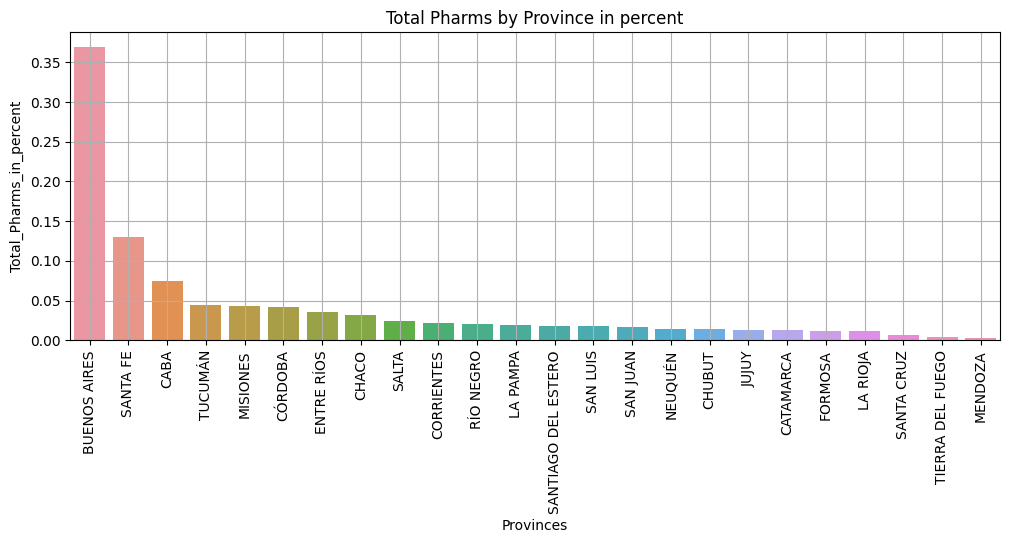

In [24]:
fig = plt.figure(figsize = (12,4))
sns.barplot(x = 'Provinces', y = 'Total_Pharms_in_percent', data = df_provincias)
plt.xticks(rotation=90) 
plt.grid()
plt.title("Total Pharms by Province in percent")
plt.show()

### Filter Data by Province

In [25]:
# Get pharms by province
def pharms_by_province(province):
    df_province =  df[df["province"]==province]
    return df_province

In [26]:
# Get all pharms by department in some province
def pharms_by_department(df_province):
    department = df_province['department'].value_counts()
    df_pharms_by_department = pd.DataFrame(
        {
            "Departments": department.keys(),
            "Total_Pharms_by_Department": department.values,
            "Total_Pharms_in_percent": department.values / department.values.sum()
        }
    )
    return df_pharms_by_department

In [27]:
data_allprovinces = {index : pharms_by_province(index) for index in provinces}
data_alldepartment = {index : pharms_by_department(data_allprovinces[index]) for index in provinces}


In [28]:
province_name_by_index = "CÓRDOBA"
df_province = data_allprovinces[province_name_by_index]# data for province "CÓRDOBA"
df_province.head()

,id,name,id_province,province,id_department,department,id_location,location,postal_code,adress,webpage
4,70140142334991,VALENTINO,14,CÓRDOBA,14,CAPITAL,14014010000,CORDOBA,5000,Catamarca 1047,NaN
129,70140142333750,HP FARMA V,14,CÓRDOBA,14,CAPITAL,14014010000,CORDOBA,5000,Elías Yofre 1050,NaN
135,70140422333755,FARMAVIDA IX,14,CÓRDOBA,42,GENERAL SAN MARTÍN,14042170000,VILLA MARIA,5900,Sarmiento 1966,NaN
177,70140212333758,GRAMIGNA,14,CÓRDOBA,21,COLÓN,14021200000,MENDIOLAZA,5107,Avenida Martín Tissera 2997,NaN
178,70140142333759,GENERAL PAZ NUEVOCENTRO,14,CÓRDOBA,14,CAPITAL,14014010000,CORDOBA,5000,Avenida Duarte Quirós 1400,NaN


In [29]:
df_department=data_alldepartment[province_name_by_index] 
df_department

,Departments,Total_Pharms_by_Department,Total_Pharms_in_percent
0,CAPITAL,295,0.521201
1,SAN JUSTO,38,0.067138
2,COLÓN,31,0.054770
3,PUNILLA,30,0.053004
4,GENERAL SAN MARTÍN,28,0.049470
5,RÍO CUARTO,25,0.044170
6,RÍO SEGUNDO,20,0.035336
7,SANTA MARÍA,16,0.028269
8,MARCOS JUÁREZ,11,0.019435
9,TERCERO ARRIBA,9,0.015901


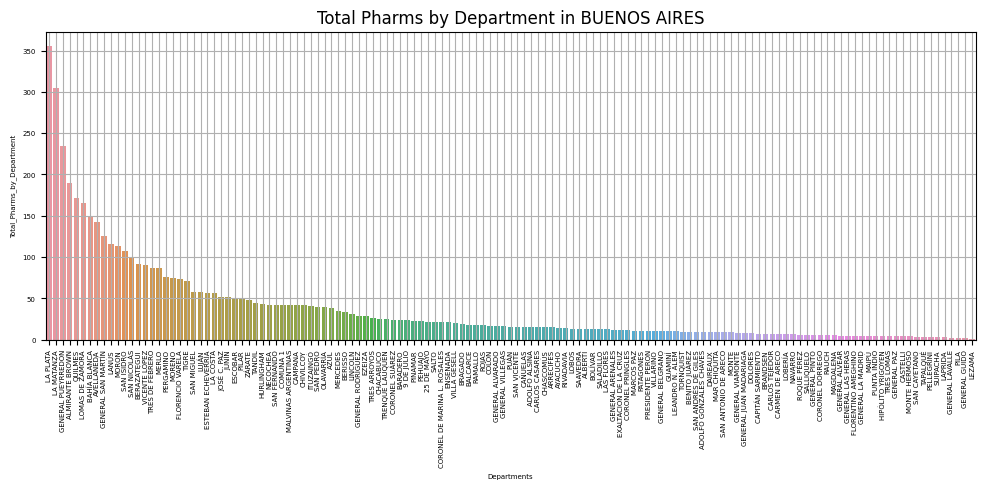

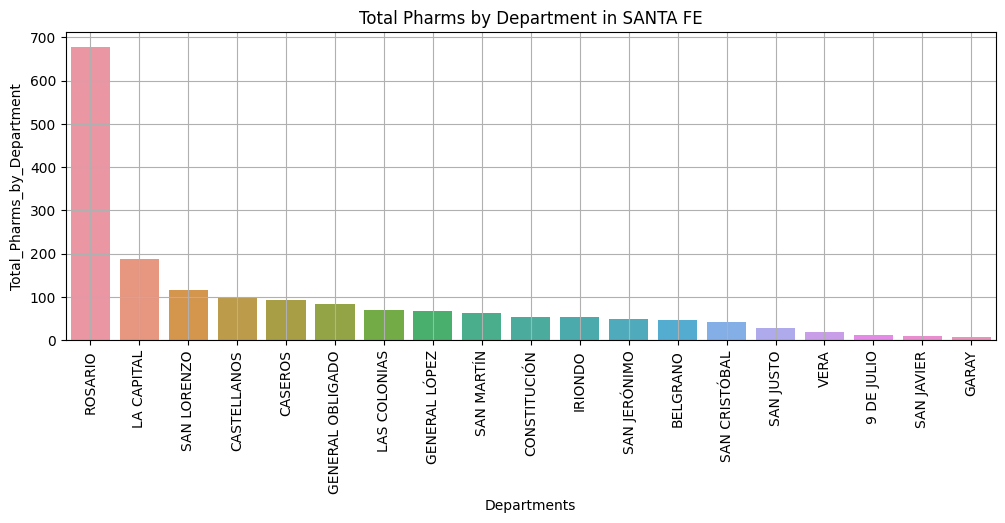

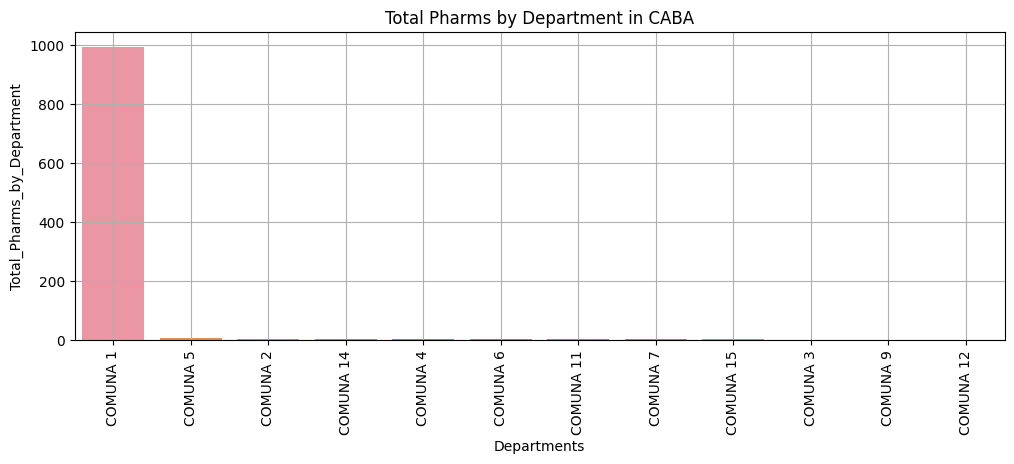

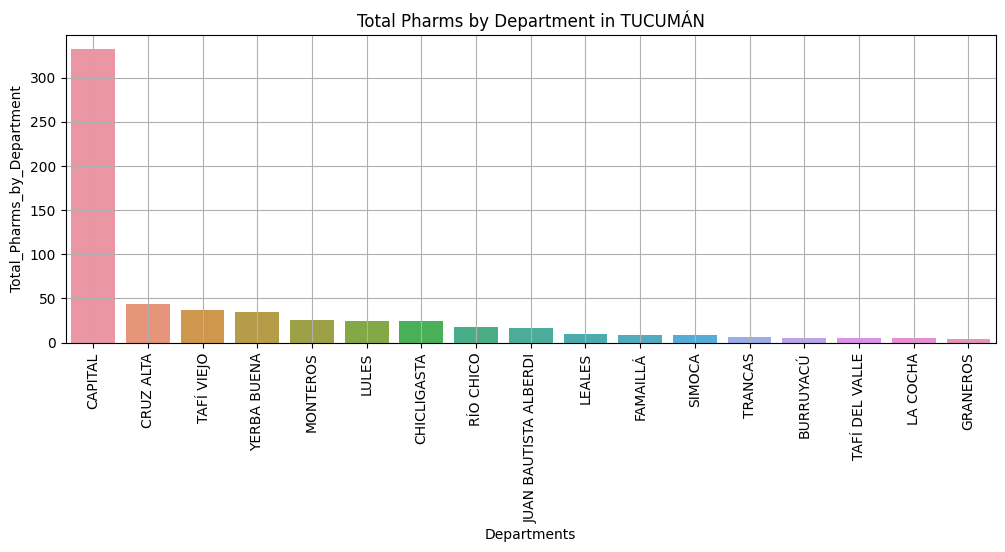

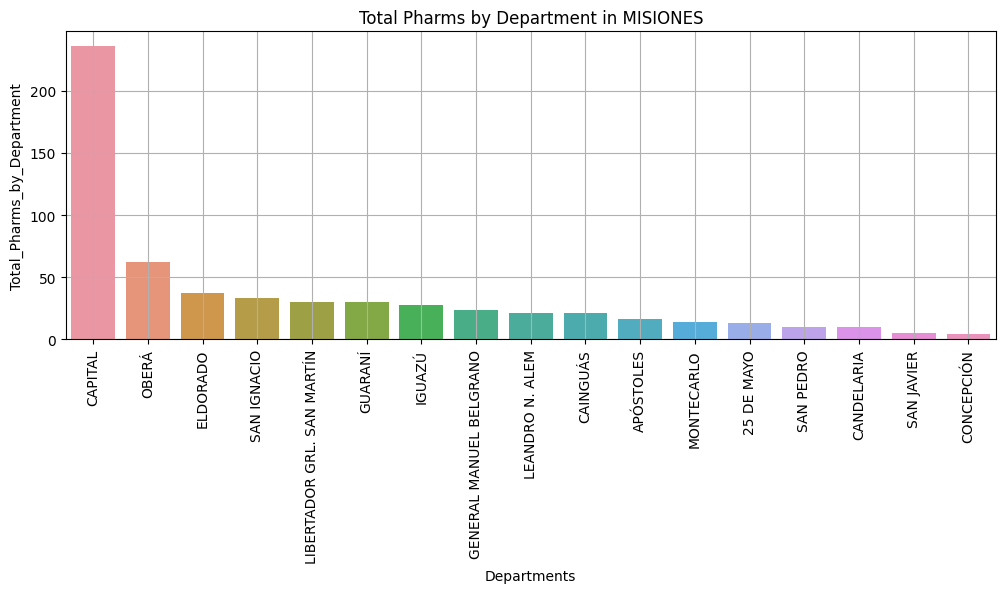

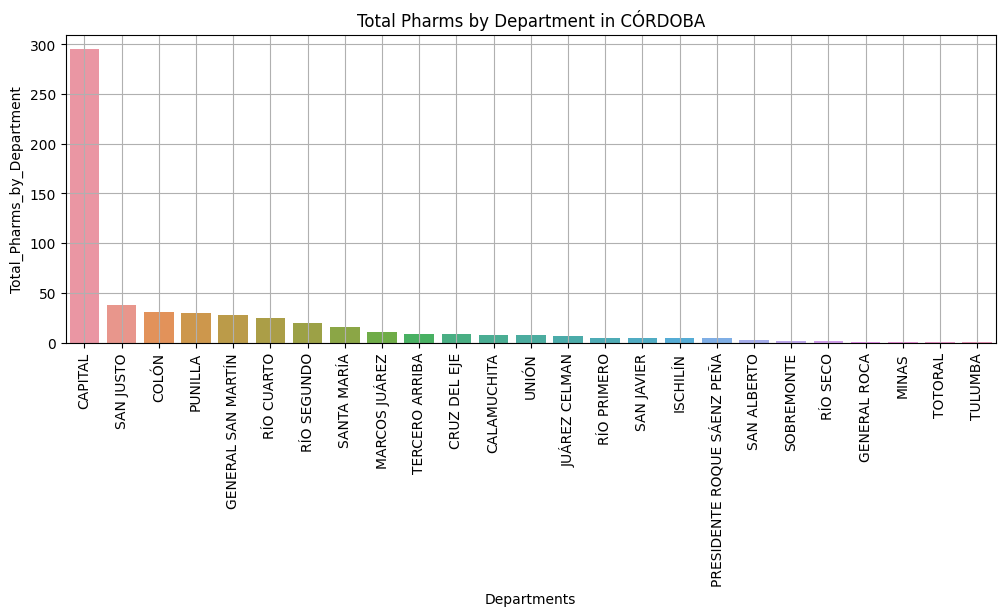

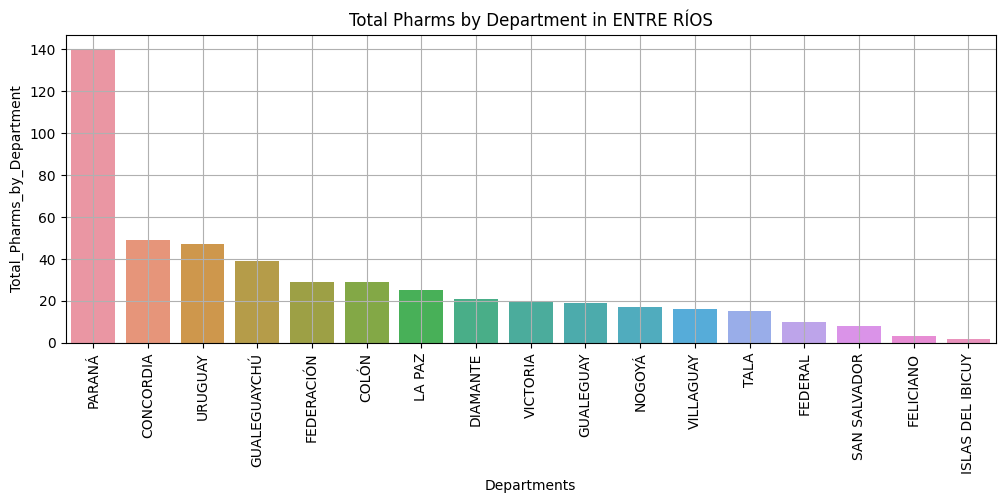

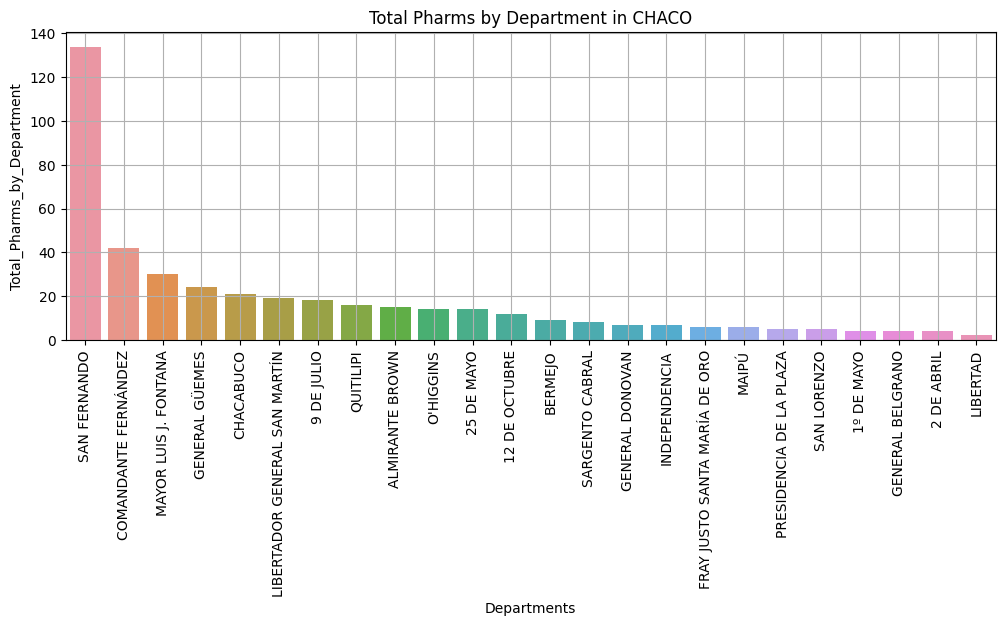

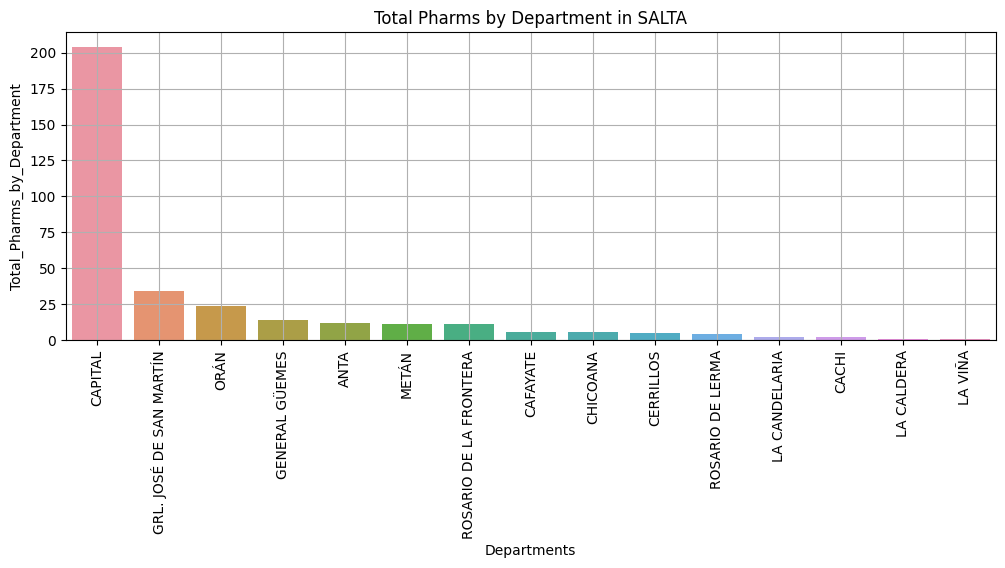

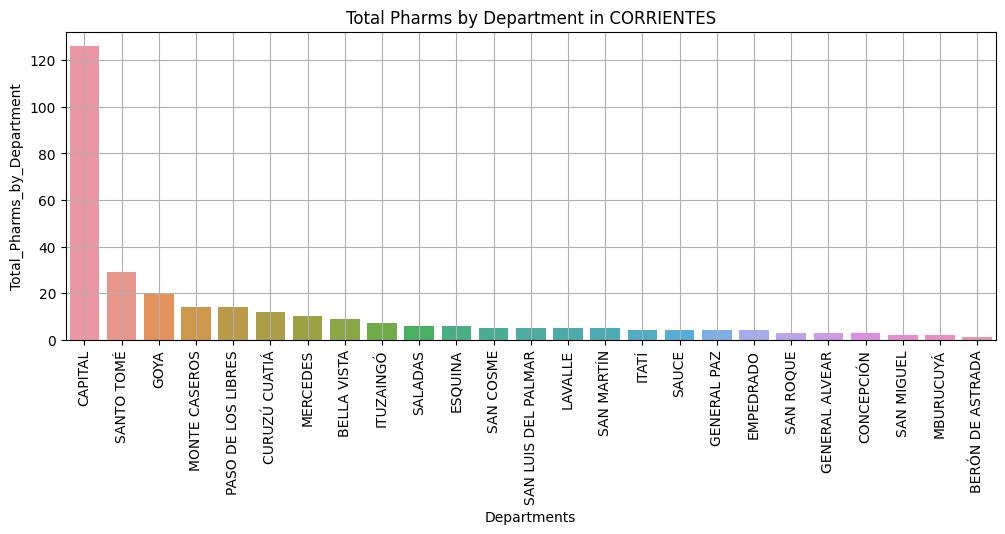

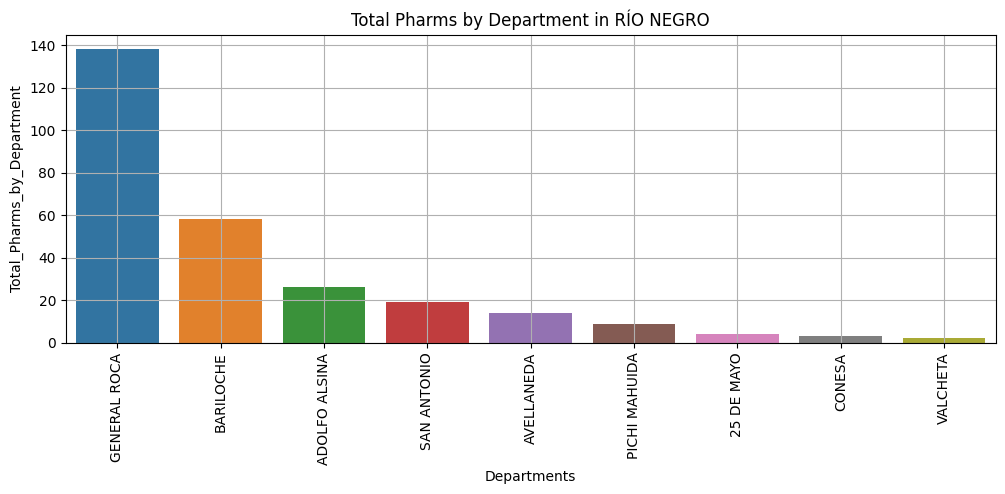

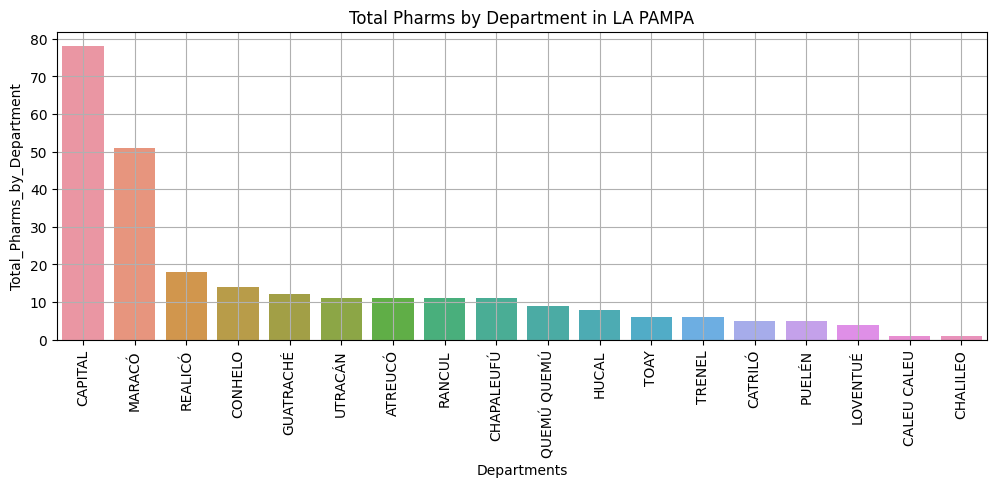

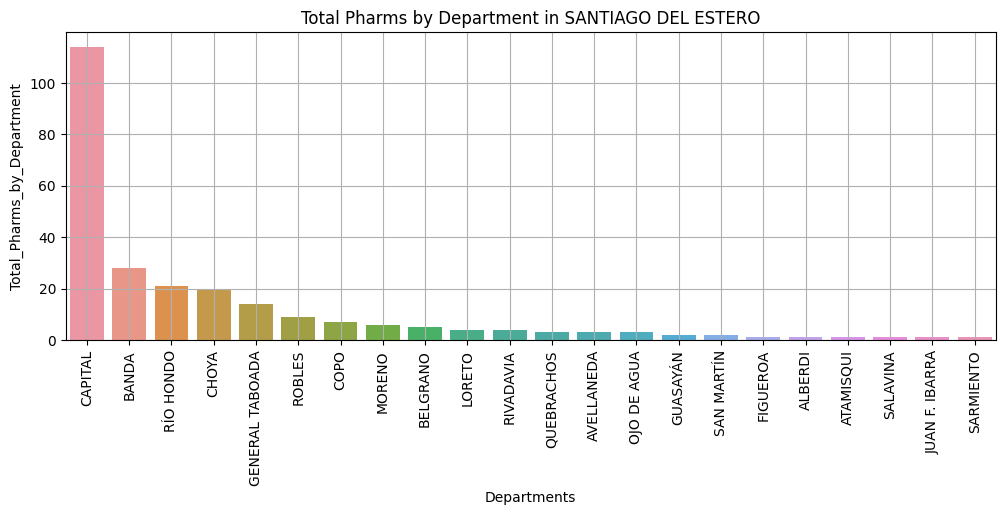

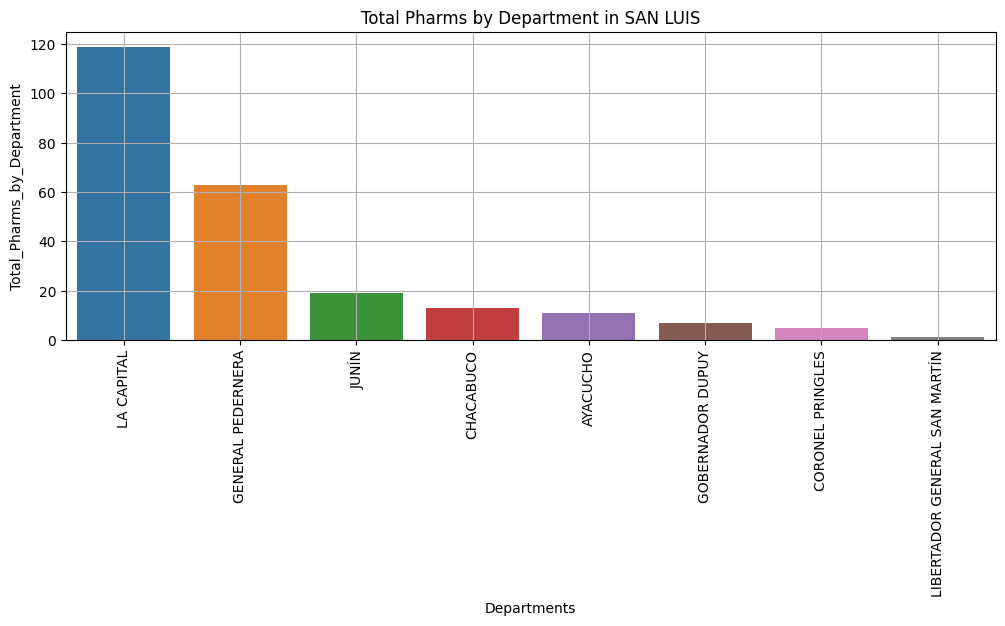

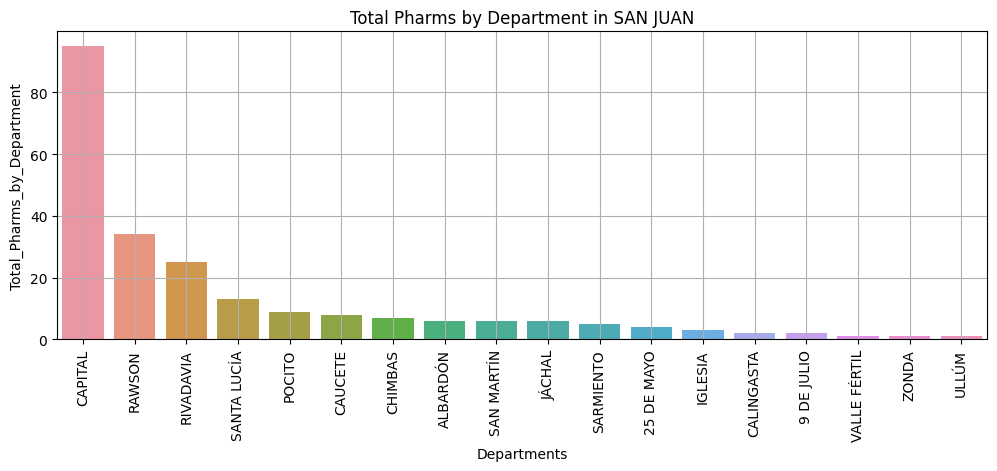

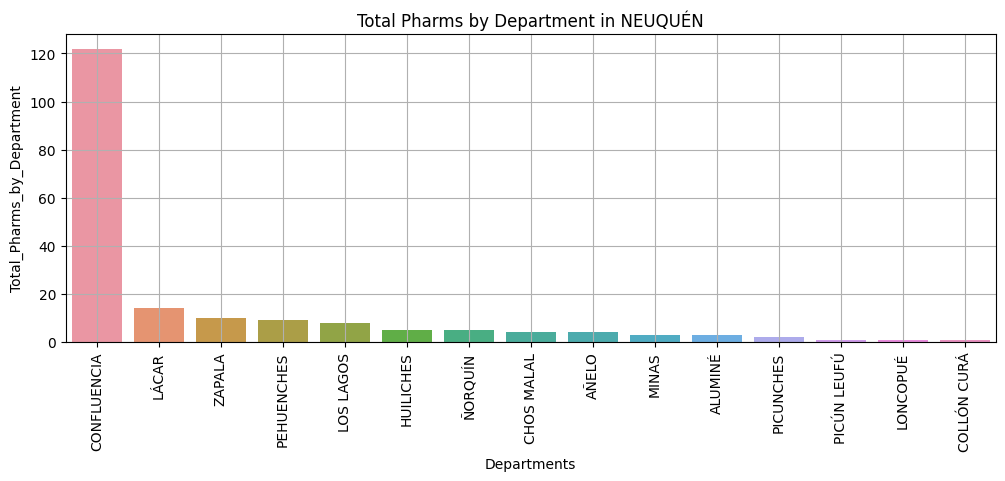

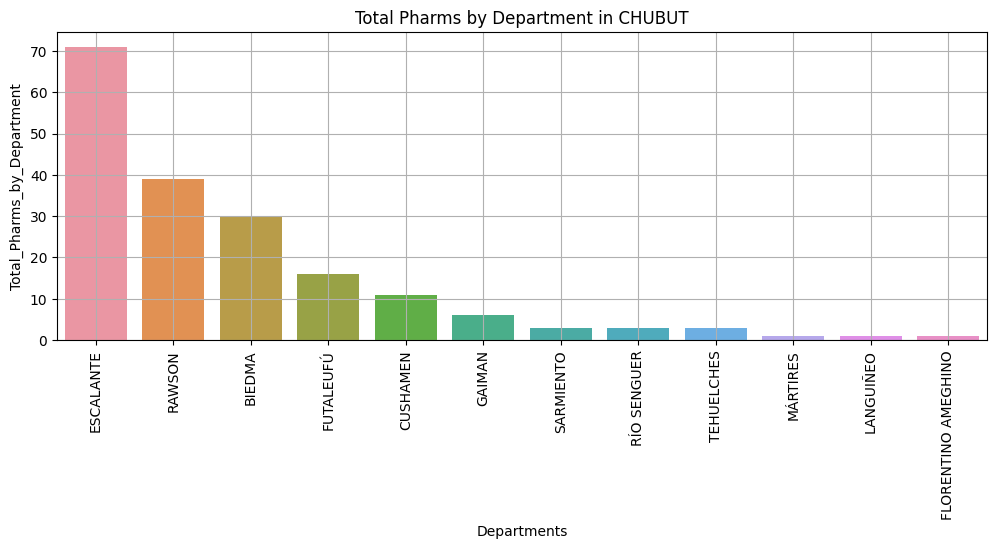

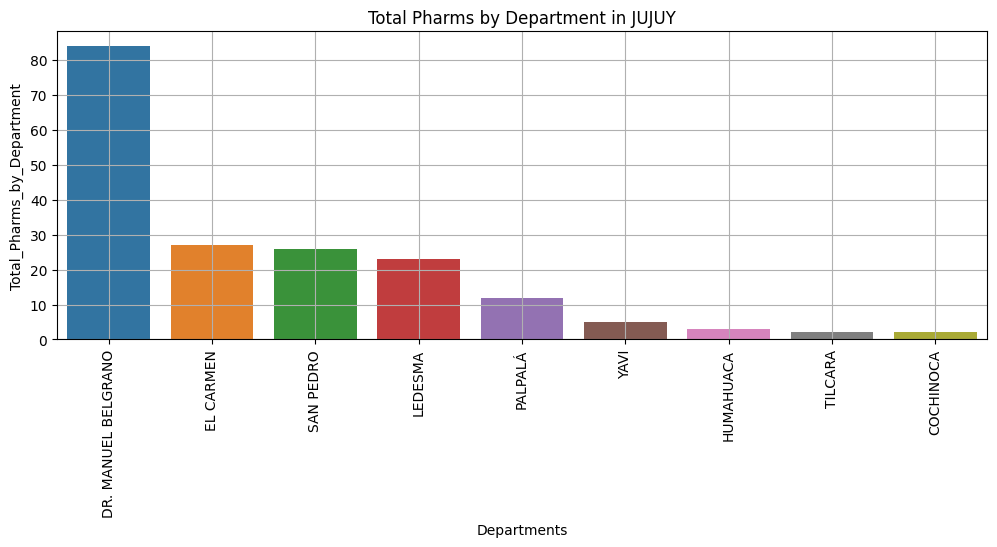

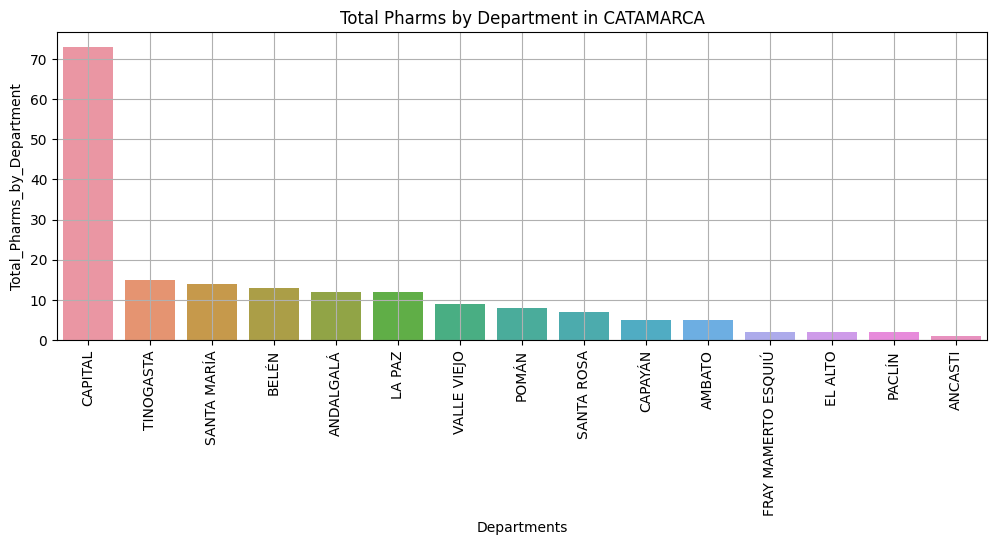

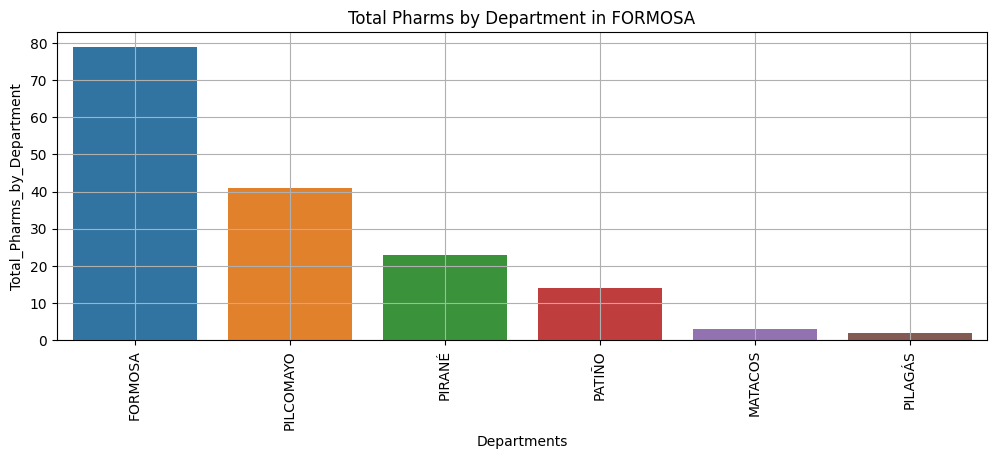

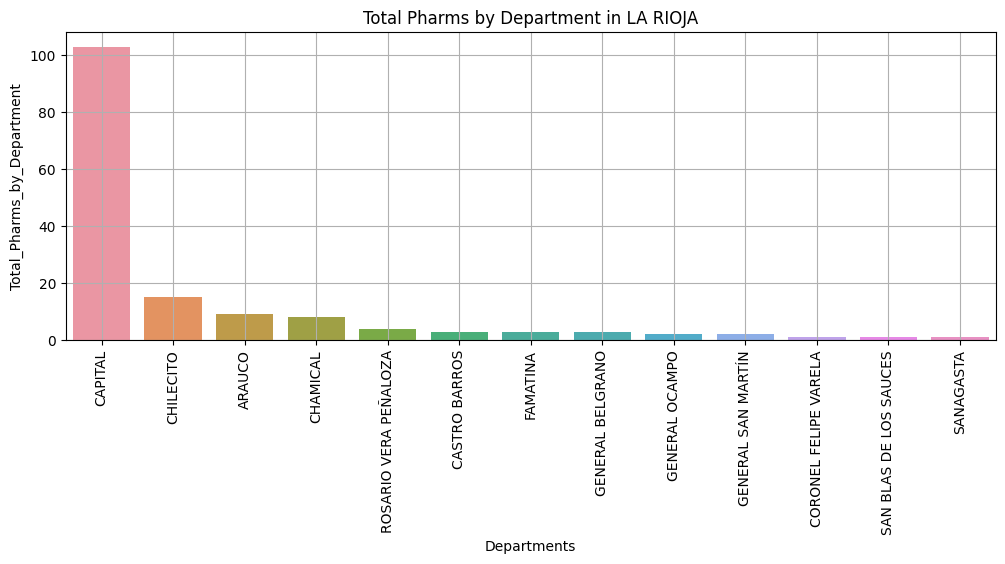

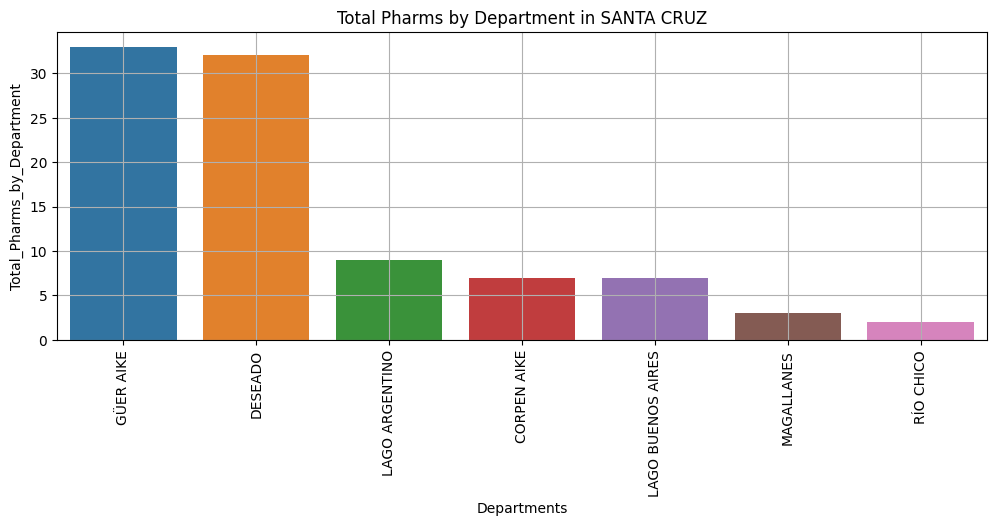

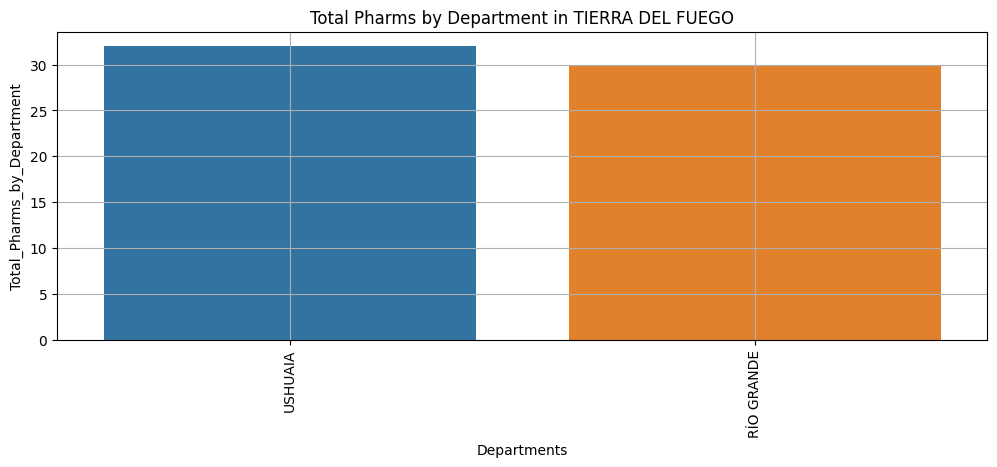

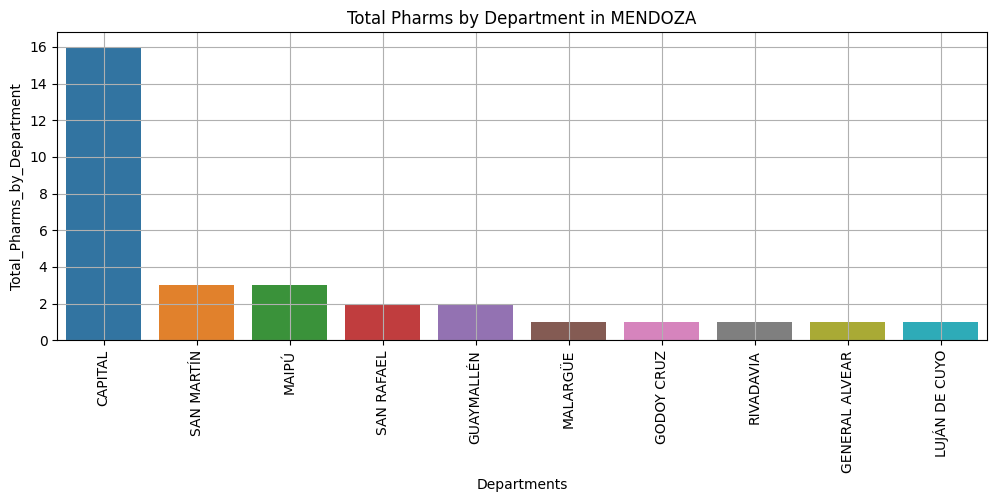

In [30]:
plt.rcParams["font.size"] = "5.0"
for province_name_by_index in provinces:
    df_department = data_alldepartment[province_name_by_index] 
    fig = plt.figure(figsize = (12,4))
    sns.barplot(x = 'Departments', y = 'Total_Pharms_by_Department', data = df_department)
    plt.xticks(rotation = 90)
    plt.rcParams["font.size"] = "10.0"
    plt.grid()
    plt.title(f"Total Pharms by Department in {province_name_by_index}")
    plt.show()

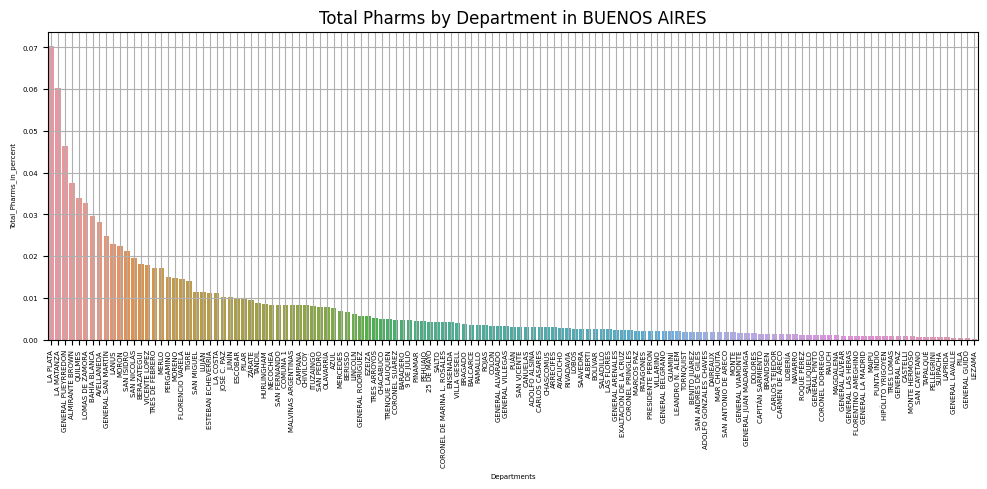

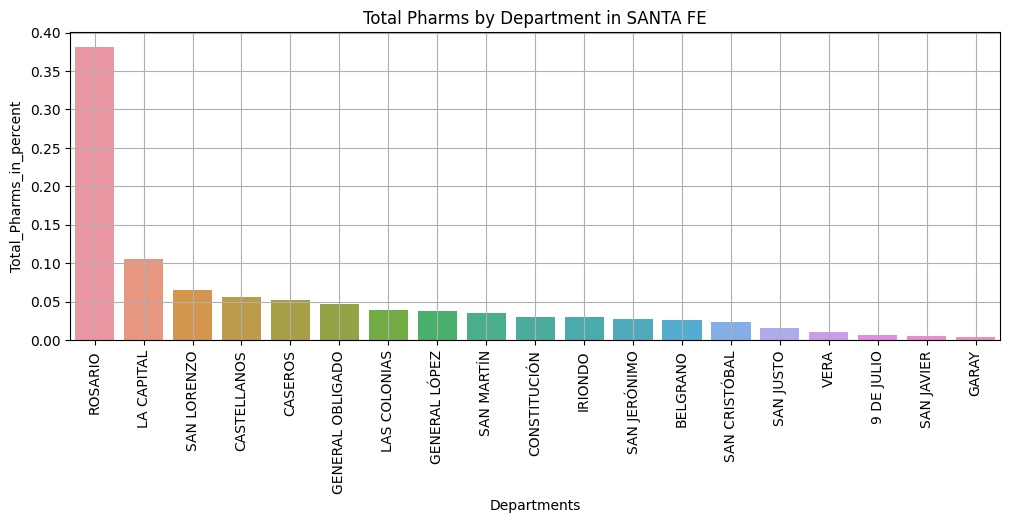

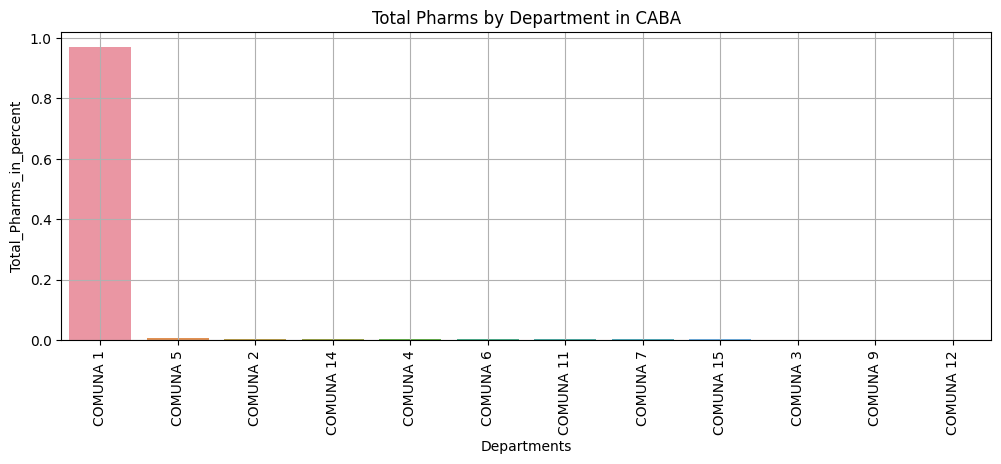

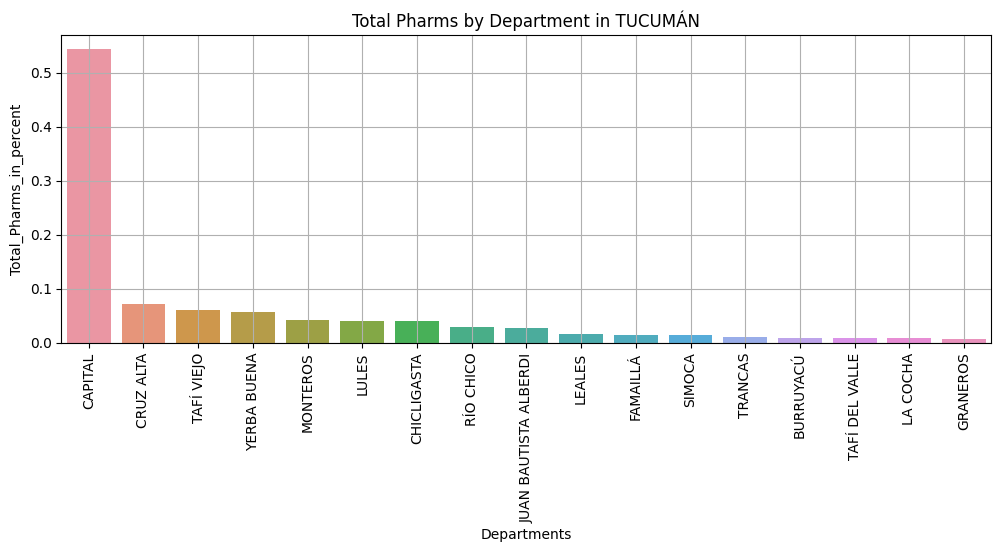

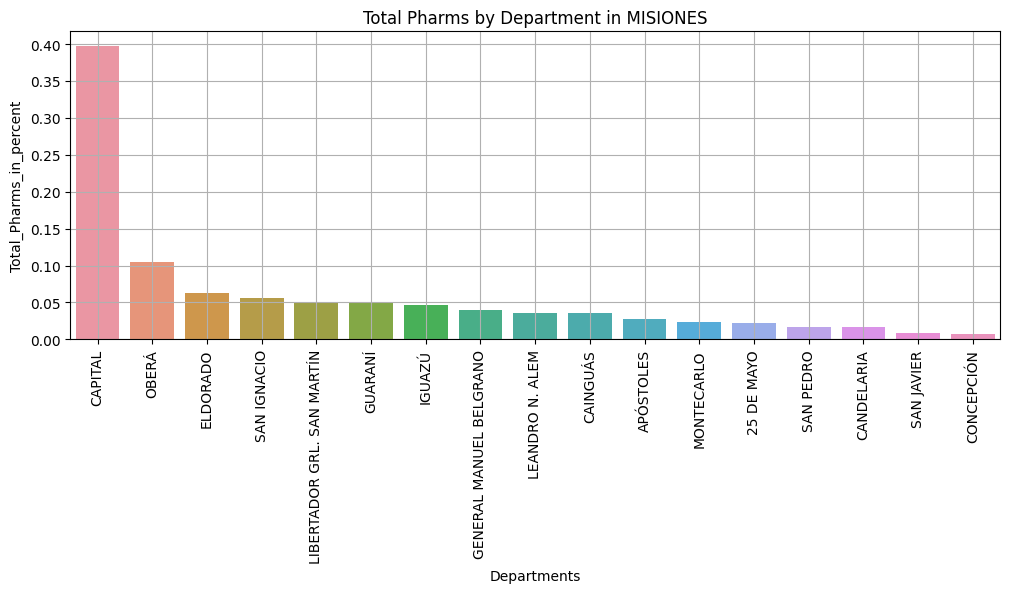

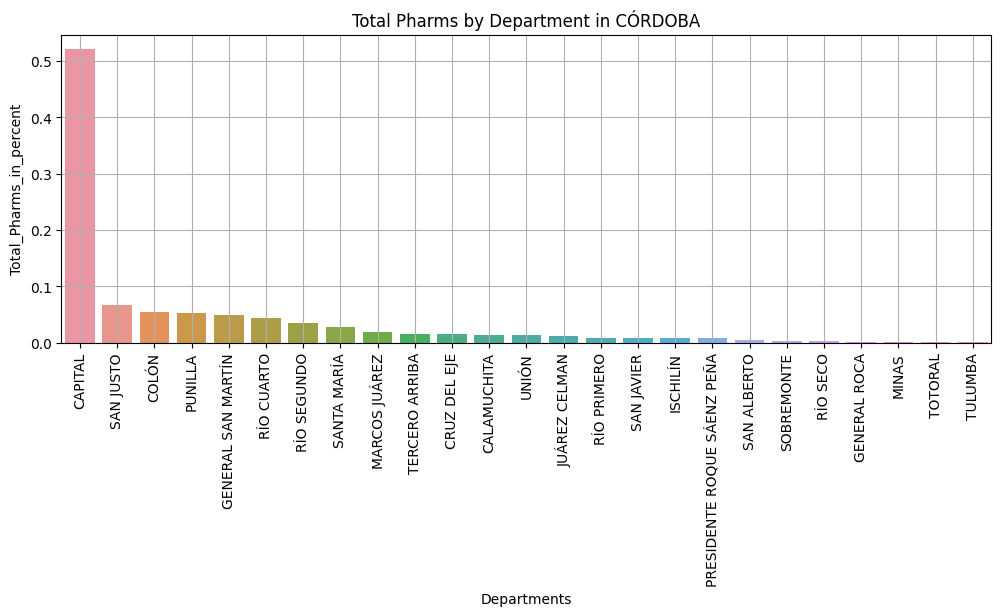

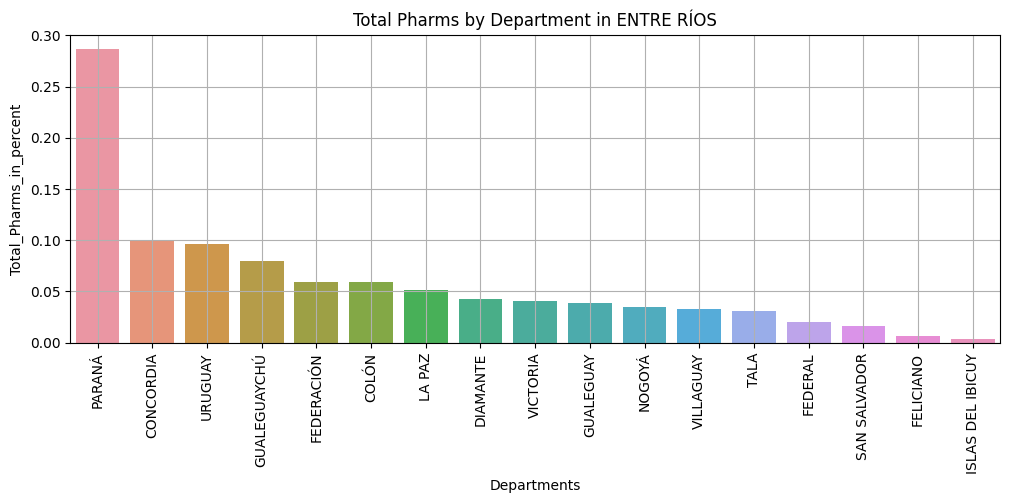

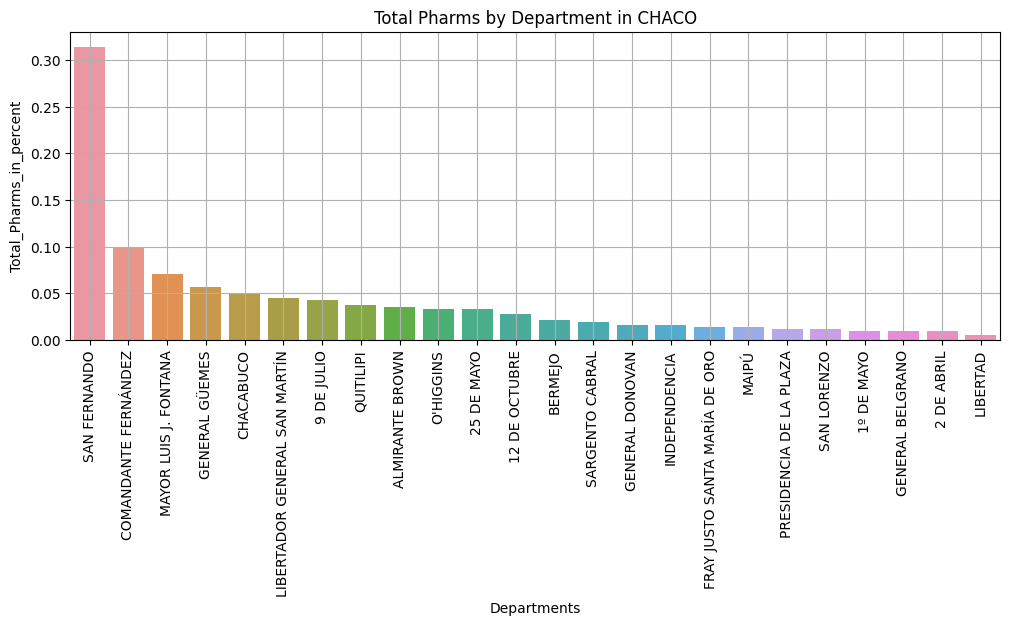

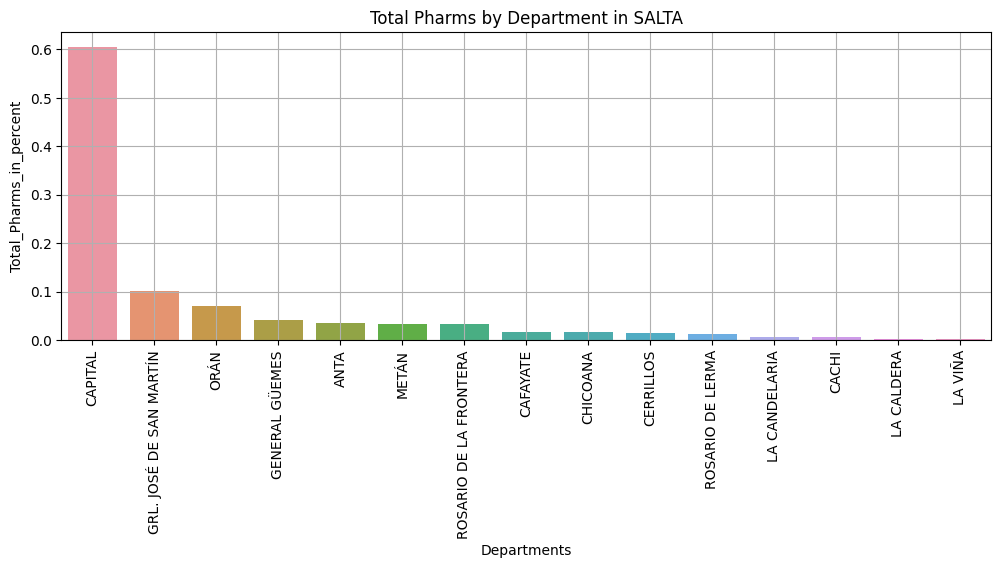

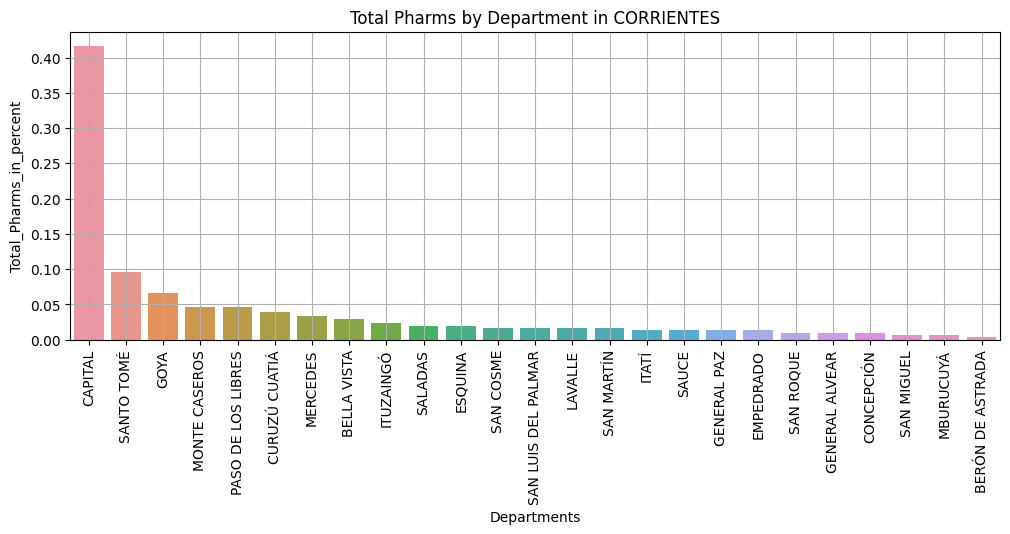

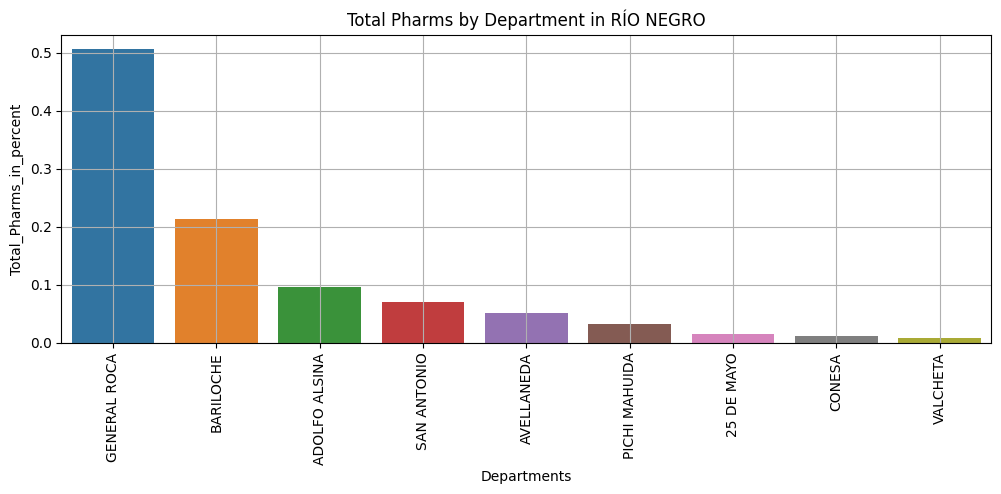

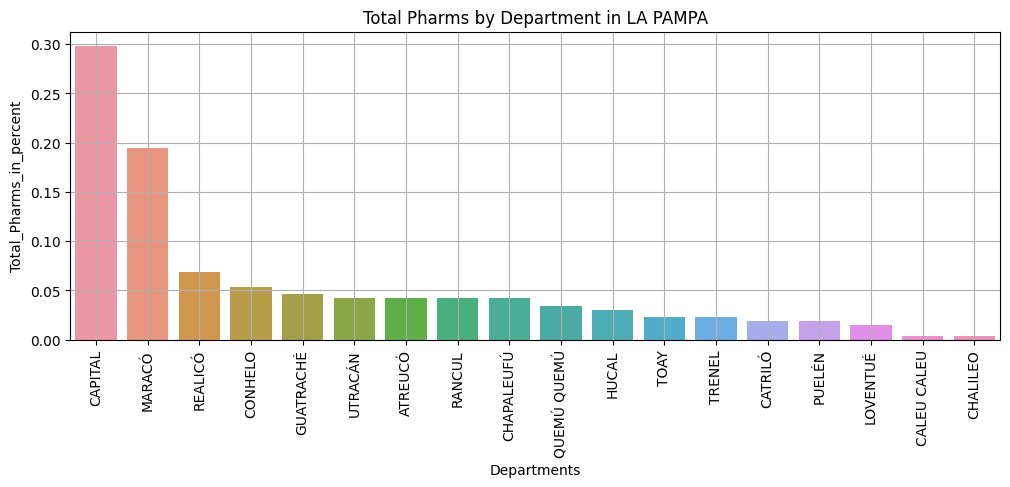

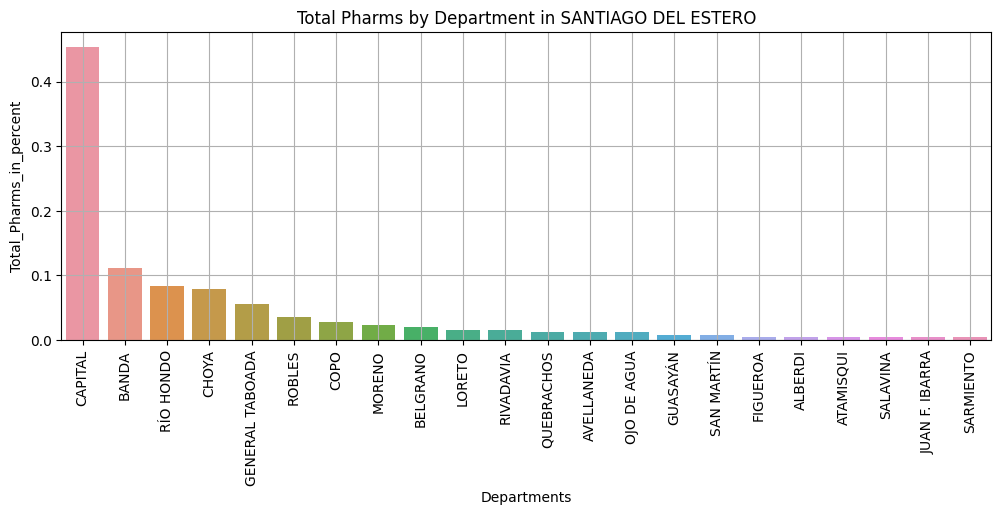

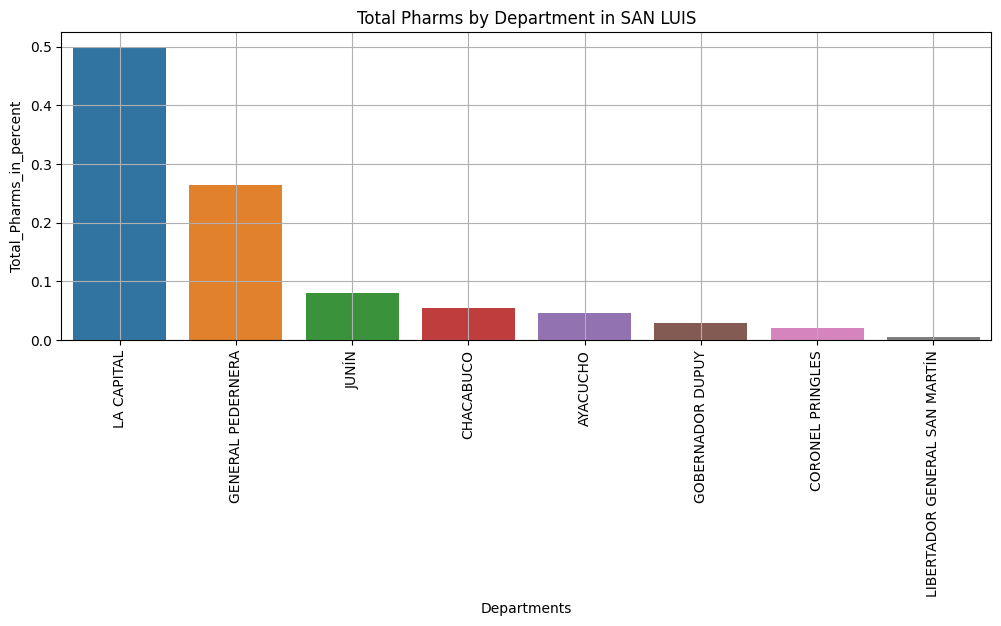

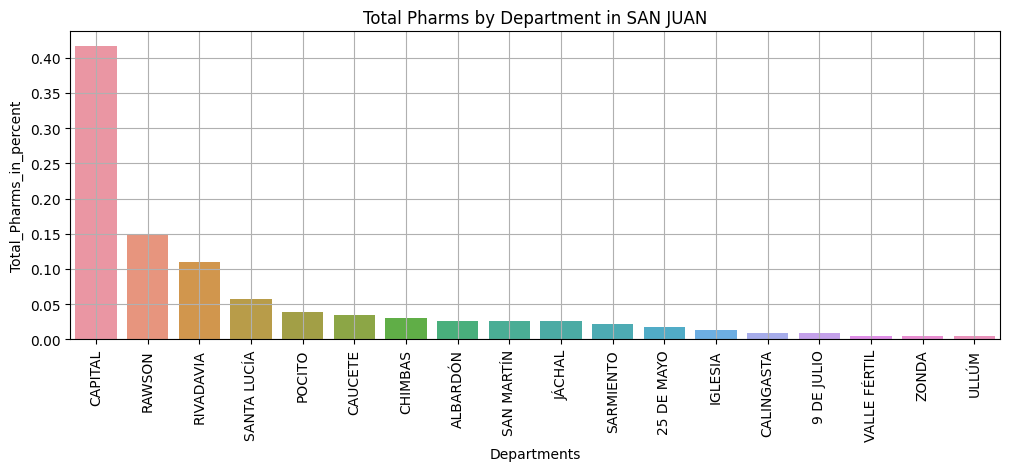

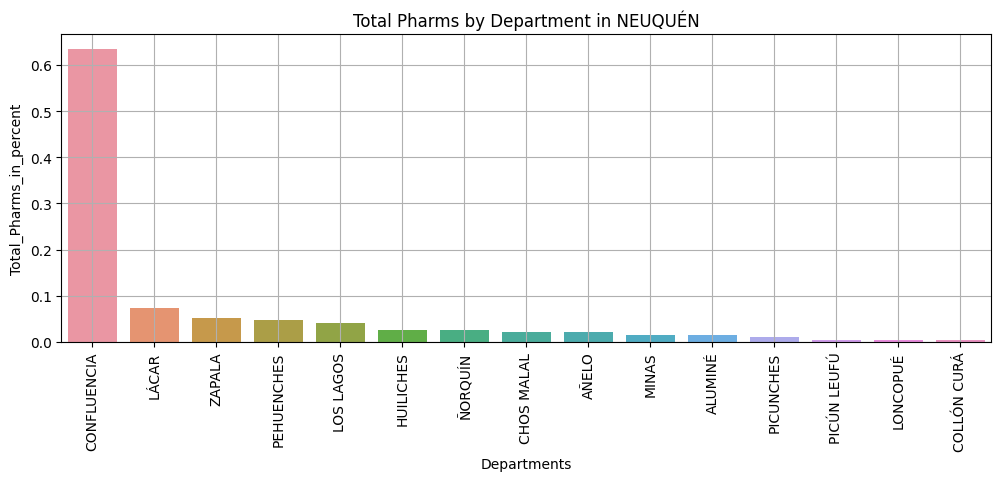

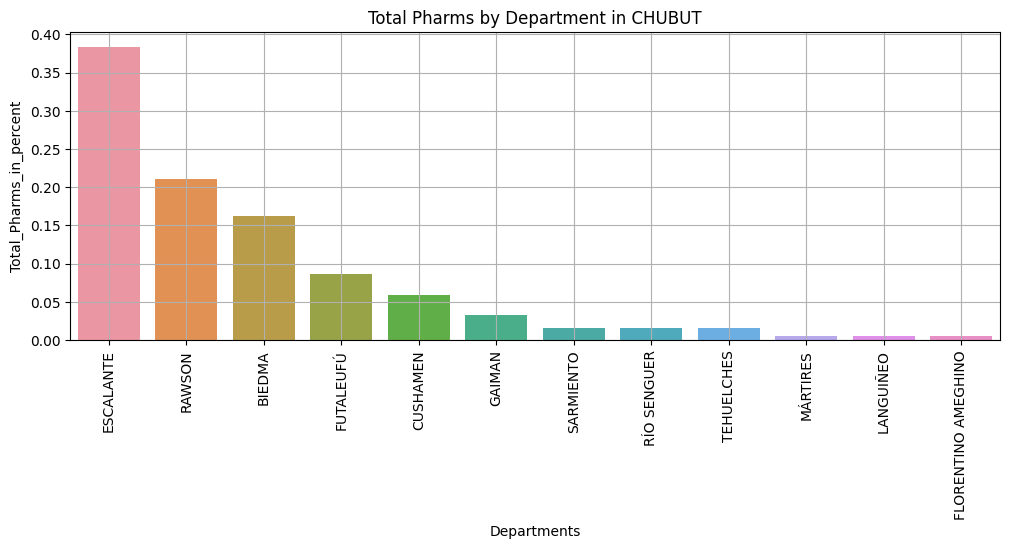

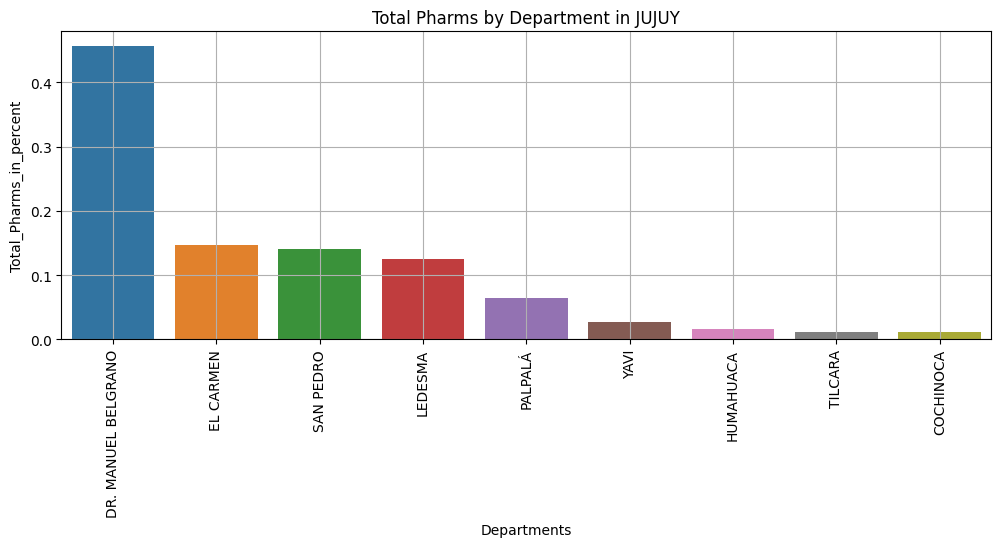

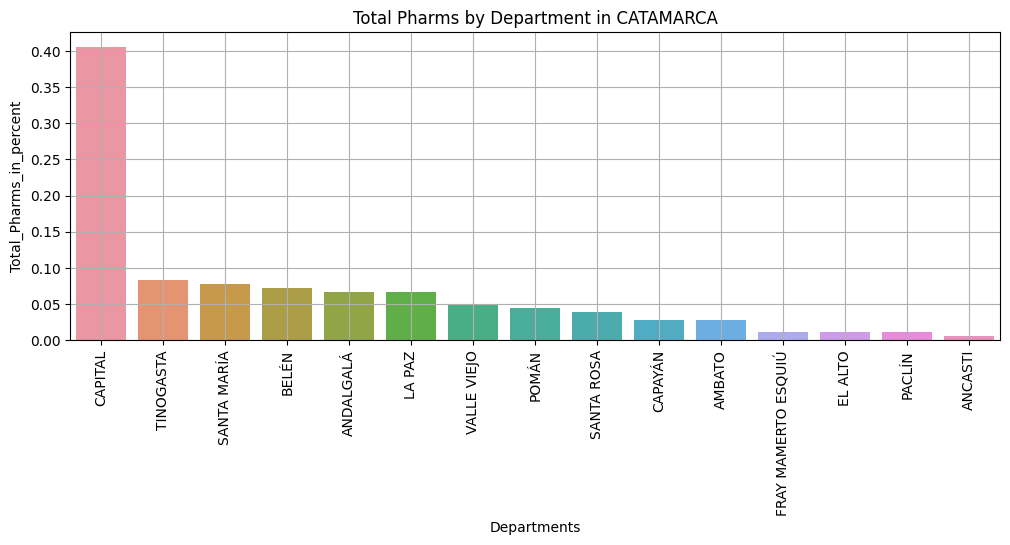

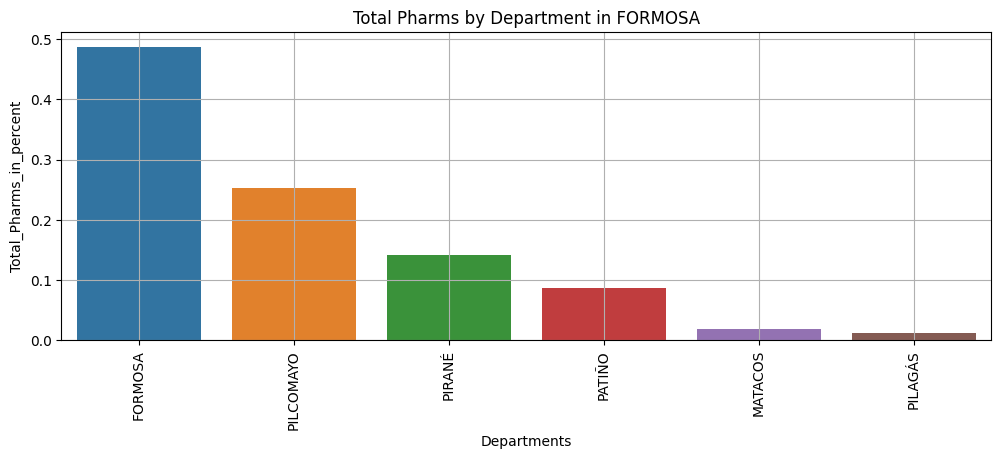

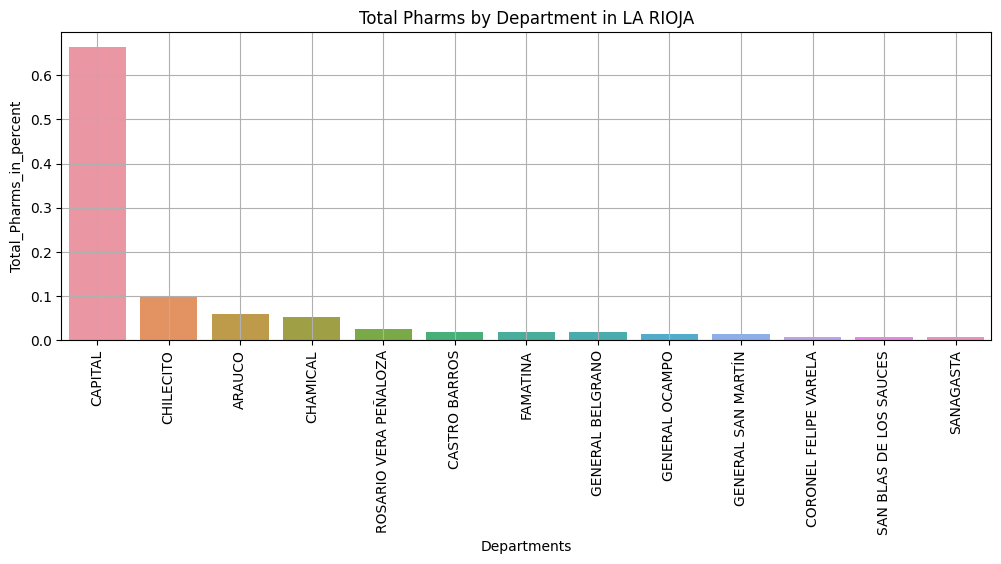

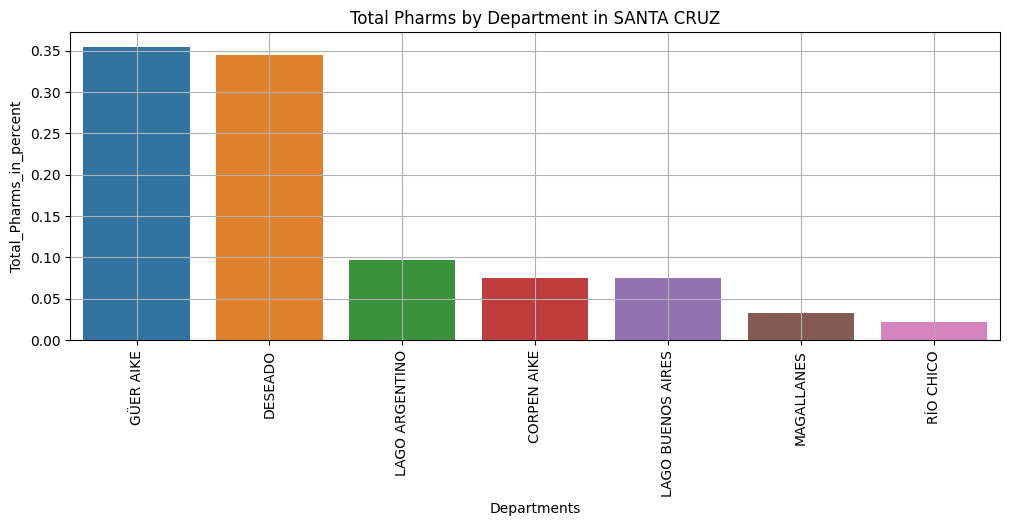

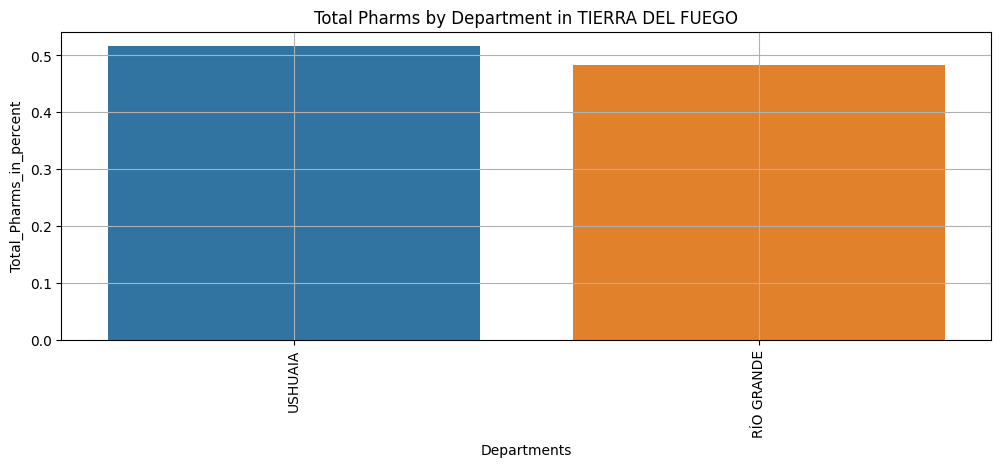

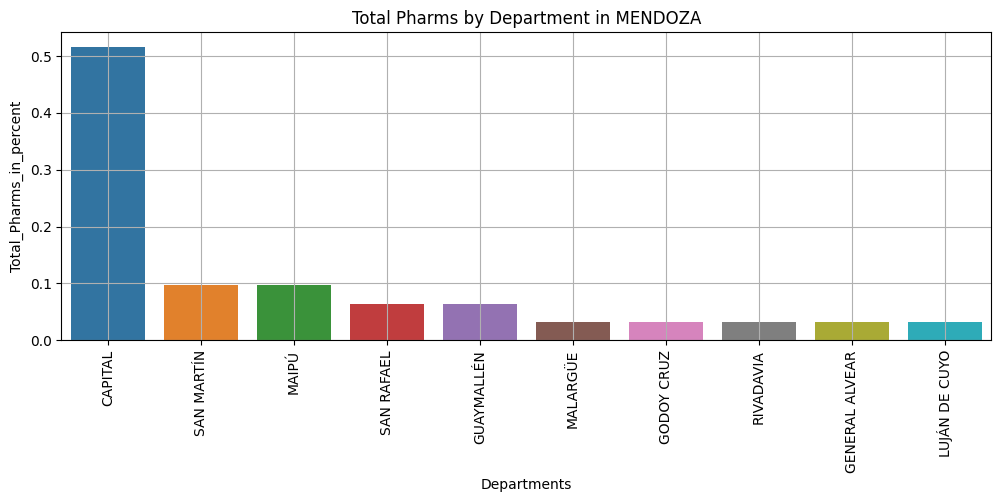

In [31]:
# barplot of all the features
plt.rcParams["font.size"] = "5.0"
for province_name_by_index in provinces:
    df_department = data_alldepartment[province_name_by_index] 
    fig = plt.figure(figsize = (12,4))
    sns.barplot(x = 'Departments', y = 'Total_Pharms_in_percent', data = df_department)
    plt.xticks(rotation = 90)
    plt.grid()
    plt.rcParams["font.size"] = "10.0"
    plt.title(f"Total Pharms by Department in {province_name_by_index}")
    plt.show()


Derive Additional Features

In [32]:
for province_name_by_index in provinces:
    df_province = data_allprovinces[province_name_by_index]# data for province "CÓRDOBA"
    file_path = file_path_crib.format(
        category = farmacias["name"],
        year = now.year,
        month = now.month,
        day = now.day,
        province = f"pharmacies_{province_name_by_index.lower().replace(' ', '_')}",
    )
    province_path = BASE_FILE_DIR / file_path
    # save data frame in CSV file
    df_province.to_csv(province_path)